In [31]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
data = pd.read_csv('../../cyberbullying/data/data.csv')

In [3]:
data.head()

,text,target
0,this is not creative those are the dictionar...,0.0
1,the term standard model is itself less npov...,0.0
2,true or false the situation as of march was...,0.0
3,next maybe you could work on being less conde...,0.0
4,this page will need disambiguation,0.0


In [4]:
data['text']=data['text'].astype(str)

In [5]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.model_selection import train_test_split

def load_data(percentage_of_sentences=None):
    
    X_train, X_test, y_train, y_test = train_test_split(data['text'],data['target'],test_size=0.3,random_state=0)

    #train_sentences, y_train = tfds.as_numpy(train_data)
    #test_sentences, y_test = tfds.as_numpy(test_data)
    
    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(X_train))
        X_train, y_train = X_train[:len_train], y_train[:len_train]
  
        len_test = int(percentage_of_sentences/100*len(X_test))
        X_test, y_test = X_test[:len_test], y_test[:len_test]
    
    X_train = [text_to_word_sequence(_) for _ in X_train]
    X_test = [text_to_word_sequence(_) for _ in X_test]
    
    return X_train, y_train, X_test, y_test


2022-03-07 17:31:23.484857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 17:31:23.484952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=50)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data.text)

y = data.target

nb_model = MultinomialNB()

nb_model.fit(X,y)

nb_model.score(X,y)

0.8935782358875769

In [68]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)
train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)

In [73]:
len_1 = train_data[train_data['target']==1].shape[0]

In [76]:
train_data_0 = train_data[train_data['target']==0].sample(len_1)

In [77]:
train_data_1 = train_data[train_data['target']==1]

In [78]:
train_data_01 = pd.concat([train_data_0,train_data_1])

In [88]:
X_train_vec = vectorizer.fit_transform(train_data_01.text)
y_train = train_data_01.target
nb_model = MultinomialNB()

#nb_model.fit(X_train,y_train)

cv_results = cross_validate(nb_model,X_train_vec,train_data_01.target,cv=10,n_jobs=-1,scoring="recall")
cv_results['test_score'].mean()

0.8205760407816483

In [83]:
X_test_vec = vectorizer.transform(test_data.text)
y_test = test_data.target

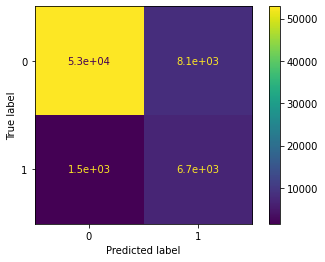

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train_vec,y_train)
y_pred = nb_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();


In [81]:
pd.DataFrame({'train': y_train.value_counts(),
              'test': y_test.value_counts()})

,train,test
0.0,142408,61047
1.0,19256,8238


In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)

def balance_df(df=None, X=None, y=None):
    X = pd.DataFrame(X)
    if df is None:
        if X is not None or y is not None:
            df = X.join(y)
        else:
            print('se debe especificar df o X,y')
            return
    else:
        if X is not None and y is not None:
            df = df.copy().reset_index(drop=True)
        else:
            print('se debe especificar df o X,y')
            return
    
#     df_class_0 = df[y == 0]
#     df_class_1 = df[y == 1]
    
#     df_class_1_over = df_class_1.sample(y.value_counts()[0], replace=True)
    
#     df_new = pd.concat([df_class_0, df_class_1_over])
    df.reset_index(drop=True,inplace=True)
    return df


In [58]:
df_new = balance_df(X=X_train, y=y_train)
df_new.shape

(161664, 2)

In [61]:
X_train

32161       note this user is a suspected sockpuppet of ...
94272       yeah dont call me a troll it was a reasonabl...
126924    once again kat and andre make it through again...
133563    people tripping on acid or other hallucinogens...
124160    mkr stuff that  just buy the dam tortillas and...
                                ...                        
176963      speedy deletion of idmilano product design  ...
117952    it is called crackling stop being pretentious ...
173685     well its not enough that it seem relevant int...
43567        re david jordan   as i said if you can find...
199340      i havent been around the page much lately si...
Name: text, Length: 161664, dtype: object

In [59]:
df_new[y==0]

/tmp/ipykernel_17448/3298942789.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[y==0]


,text,target
0,note this user is a suspected sockpuppet of ...,0.0
1,yeah dont call me a troll it was a reasonabl...,0.0
2,once again kat and andre make it through again...,0.0
3,people tripping on acid or other hallucinogens...,0.0
4,mkr stuff that just buy the dam tortillas and...,0.0
...,...,...
161659,speedy deletion of idmilano product design ...,0.0
161660,it is called crackling stop being pretentious ...,0.0
161661,well its not enough that it seem relevant int...,0.0
161662,re david jordan as i said if you can find...,0.0


In [ ]:
X_train = df_new.drop(columns='Class')
y_train = df_new['Class']

In [ ]:
pd.DataFrame({'train': y_train.value_counts(),
              'val': y_val.value_counts(),
              'test': y_test.value_counts()})

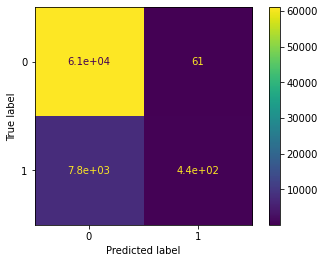

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()


In [22]:
y_train.value_counts()

0.0    142408
1.0     19256
Name: target, dtype: int64

In [7]:
#word2vec = Word2Vec(sentences=X_train, vector_size=10)

In [8]:
#comm_1 = word2vec.wv.most_similar('asshole')
#comm_1

[('nigger', 0.926256000995636),
 ('pollute', 0.9177514910697937),
 ('cunt', 0.916571319103241),
 ('childish', 0.9106816053390503),
 ('excuse', 0.9054148197174072),
 ('idiot', 0.8895363211631775),
 ('curious', 0.8892170190811157),
 ('insult', 0.8844789266586304),
 ('huh', 0.8802302479743958),
 ('terribly', 0.8771545886993408)]

In [9]:
#vocab_size = len(word2vec.wv.key_to_index)
#vocab_size

28817

In [10]:
model = MultinomialNB()
cv_results = cross_validate(model,X_train,y_train,cv=10)

/home/juanpedro/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[list(['please', 'do', 'not', 'remove', 'my', 'input', 'again', 'it', 'violates', 'wppreserve', 'wpvandalism', 'and', 'wpnotcensored', 'also', 'please', 'stop', 'being', 'idiot', 'americans', 'and', 'offending', 'the', 'rest', 'of', 'the', 'world', 'with', 'your', 'backward', 'biased', 'and', 'distorted', 'views', 'which', 'you', 'try', 'to', 'force', 'upon', 'is', 'like', 'this', 'articles', 'title'])
 list(['he', 'also', 'has', 'a', 'problem', 'with', 'his', 'left', 'eye', 'so', 'he', 'wears', 'an', 'eyepatch', 'or', 'sunglasses', 'but', 'its', 'okay', 'cause', 'he', 'is', 'samuel', 'motherfucking', 'jackson', 'semiprotected', 'edit', 'request', 'on', 'may', 'the', 'middle', '

/home/juanpedro/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[list(['note', 'this', 'user', 'is', 'a', 'suspected', 'sockpuppet', 'of', 'banned', 'who', 'is', 'engaged', 'in', 'the', 'typical', 'pattern', 'of', 'revert', 'warring', 'and', 'inciting', 'hatred', 'between', 'editors', 'of', 'different', 'nationalities'])
 list(['yeah', 'dont', 'call', 'me', 'a', 'troll', 'it', 'was', 'a', 'reasonable', 'request', 'with', 'perfectly', 'clear', 'logic'])
 list(['once', 'again', 'kat', 'and', 'andre', 'make', 'it', 'through', 'again', 'which', 'mkr', 'producers', 'dick', 'did', 'they', 'suck', 'to', 'get', 'through', 'im', 'fucking', 'hate', 'them'])
 ...
 list(['merger', 'proposal', 'hi', 'i', 'propose', 'a', 'merge', 'of', 'napa', 'citycounty

In [11]:
cv_results

{'fit_time': array([0.51289868, 0.25315309, 0.23274684, 0.25553799, 0.22250247,
        0.22286749, 0.23467255, 0.25012732, 0.2190578 , 0.25229836]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}